In [9]:
# Q1 & Q2: CNN Training on FashionMNIST Twist
# Imports and dataset loading
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_train = pd.read_csv('datasets/x_train.csv').values
x_test = pd.read_csv('datasets/x_test.csv').values
y_train = pd.read_csv('datasets/y_train.csv').values
y_test = pd.read_csv('datasets/y_test.csv').values

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

# Define improved model for Q2
model2 = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (5, 5), padding='same', activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=6, batch_size=64, validation_split=0.1)


/Users/rishi/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 127s 148ms/step - accuracy: 0.9275 - loss: 0.2046 - val_accuracy: 0.9768 - val_loss: 0.0743
Epoch 2/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 145s 171ms/step - accuracy: 0.9818 - loss: 0.0552 - val_accuracy: 0.9863 - val_loss: 0.0453
Epoch 3/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 112ms/step - accuracy: 0.9888 - loss: 0.0338 - val_accuracy: 0.9848 - val_loss: 0.0470
Epoch 4/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.9909 - loss: 0.0247 - val_accuracy: 0.9867 - val_loss: 0.0426
Epoch 5/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 109s 129ms/step - accuracy: 0.9924 - loss: 0.0209 - val_accuracy: 0.9867 - val_loss: 0.0414
Epoch 6/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 124s 147ms/step - accuracy: 0.9942 - loss: 0.0152 - val_accuracy: 0.9868 - val_loss: 0.0440


# Q4: Using Your Own Encoding
Explore the learned feature representations from the Q2 model.

In [15]:
# Force model2 to build its input by running a prediction on one sample
_ = model2.predict(x_train[:1])

# Now you can safely extract the encoder model
encoder_model = Model(inputs=model2.layers[0].input, outputs=model2.layers[-2].output)

# Extract features (encodings) for the test data
features = encoder_model.predict(x_test)  # Shape should be (num_samples, 512)

# Convert one-hot encoded test labels back to class labels for visualization
y_test_labels = np.argmax(y_test, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [16]:
# Additional imports for Q4
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

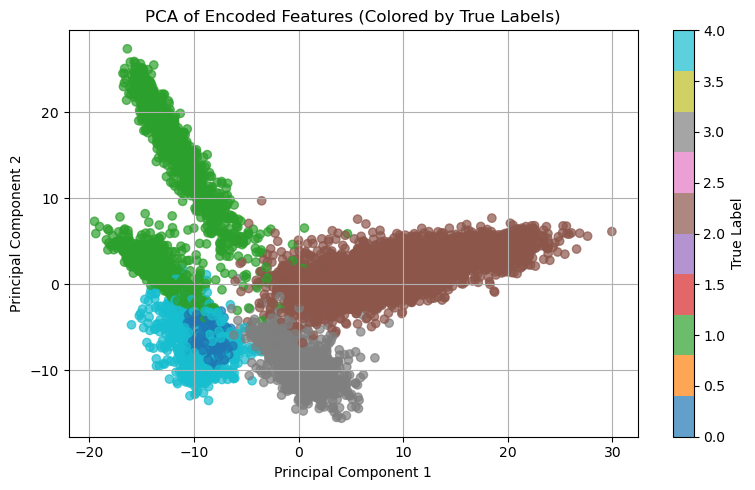

In [17]:
# Step 2: PCA Visualization of the Encodings
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(8,5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=y_test_labels, cmap='tab10', alpha=0.7)
plt.title("PCA of Encoded Features (Colored by True Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="True Label")
plt.grid(True)
plt.tight_layout()
plt.show()

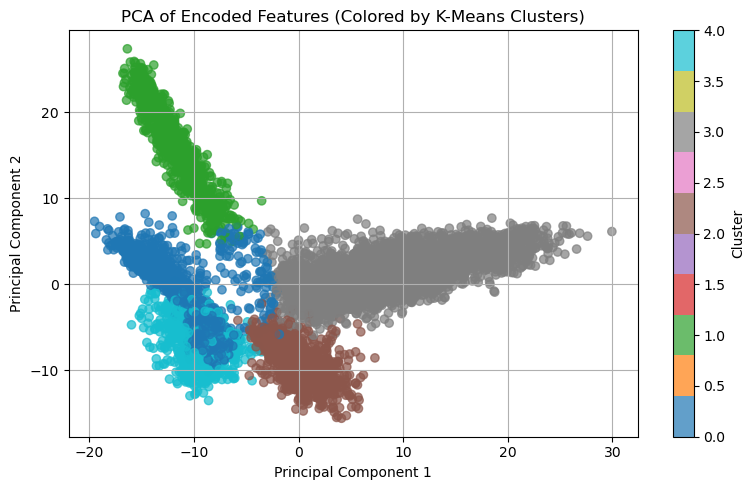

In [18]:
# Step 3: Clustering the Encodings with K-Means (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(features)

plt.figure(figsize=(8,5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='tab10', alpha=0.7)
plt.title("PCA of Encoded Features (Colored by K-Means Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

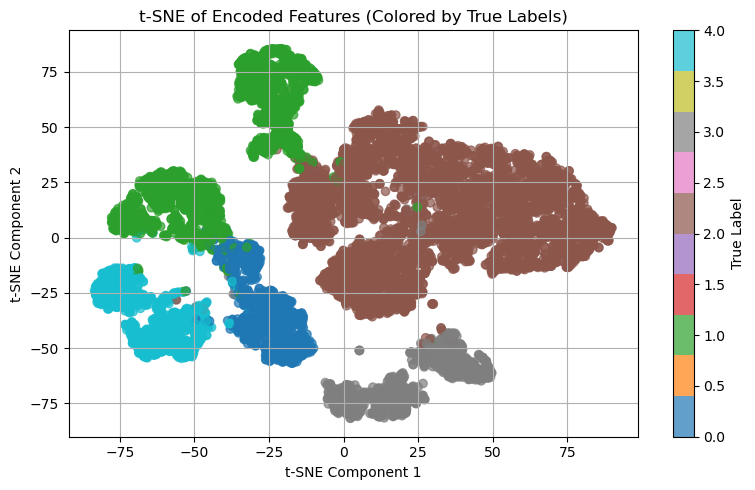

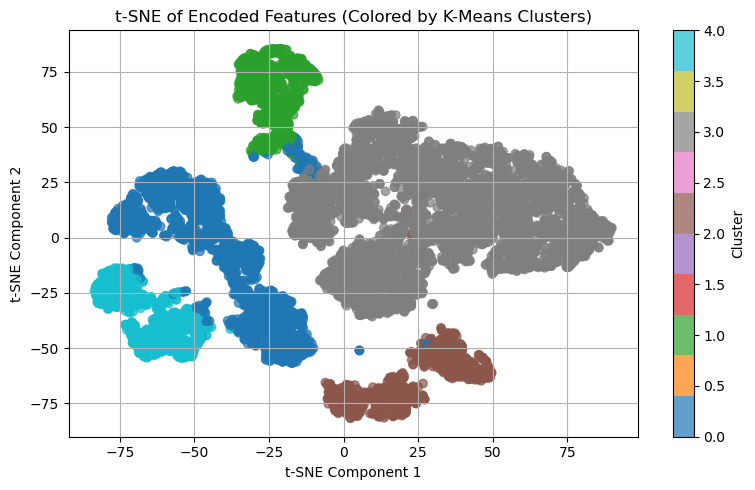

In [19]:
# Step 4 (Optional): t-SNE Visualization for non-linear structure
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features)

# t-SNE plot with true labels
plt.figure(figsize=(8,5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=y_test_labels, cmap='tab10', alpha=0.7)
plt.title("t-SNE of Encoded Features (Colored by True Labels)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="True Label")
plt.grid(True)
plt.tight_layout()
plt.show()

# t-SNE plot with cluster labels
plt.figure(figsize=(8,5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=cluster_labels, cmap='tab10', alpha=0.7)
plt.title("t-SNE of Encoded Features (Colored by K-Means Clusters)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()